# Gaussian process regression
*Blaine Rogers &lt;<br1314@ic.ac.uk>&gt;, 25-09-2016*

Tools for GPs with Gaussian likelihoods and Gaussian noise can be found in the `gptf.gpr` module. We can create a GP by passing an appropriate `gptf.kernels.Kernel` to the constructor of `gptf.gpr.GPR`.

In [1]:
from IPython.display import display_html
import gptf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# create a GP using the RBF kernel
gp = gptf.gpr.GPR(
    gptf.kernels.RBF(variance=10.), 
    noise_variance=.25
)
display_html(gp.summary(fmt='html'), raw=True)

Parameterized object gp 
 Params 
 
 
 name 
 value 
 transform 
 prior 
 
 
 gp.kernel. lengthscales 
 1.000 
 +ve (Exp) 
 nyi 
 
 
 gp.kernel. variance 
 10.000 
 +ve (Exp) 
 nyi 
 
 
 gp.likelihood. variance 
 0.250 
 +ve (Exp) 
 nyi

For testing, we generate a sample function from the prior distribution.

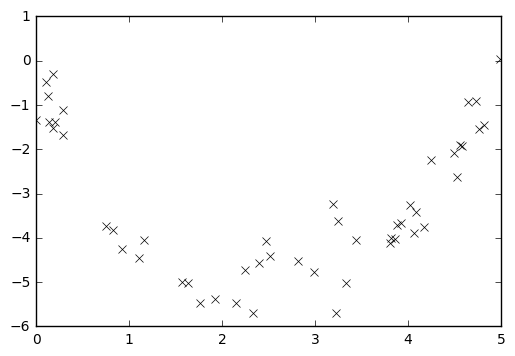

In [2]:
X = np.random.uniform(0., 5., (50, 1))
# 1 latent function, 1 sample
Y = gp.compute_prior_samples(X, 1, 1)[0]
plt.plot(X, Y, 'kx')
plt.show()

Computing the posterior mean and variance, we see that our GP fits the data well. This is unsurprising, since we generated the data with the same hyperparameters.

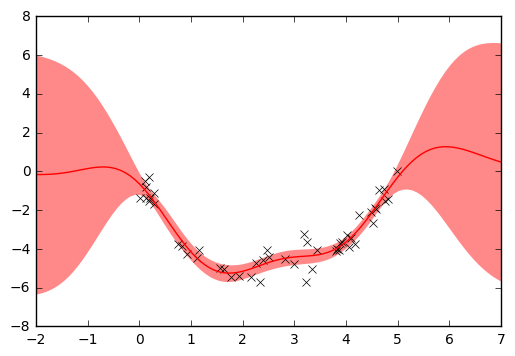

In [3]:
def plot_posterior_mean_var(gp, X, Y, test_points):
    mean, var = gp.compute_posterior_mean_var(X, Y, test_points)
    mean, var = mean[:, 0], var[:, 0]
    sigma = np.sqrt(var)
    plt.plot(X, Y, 'kx')
    plt.plot(test_points[:, 0], mean, 'r-')
    plt.fill_between(test_points[:,0], mean + 2*sigma, mean - 2*sigma,
                     color='#ff8888', linewidth=.0)
    plt.show()

test_points = np.linspace(-2, 7, 100).reshape(-1, 1)  
plot_posterior_mean_var(gp, X, Y, test_points)

If we fiddle with the hyperparameters, the GP will fit the data more poorly.


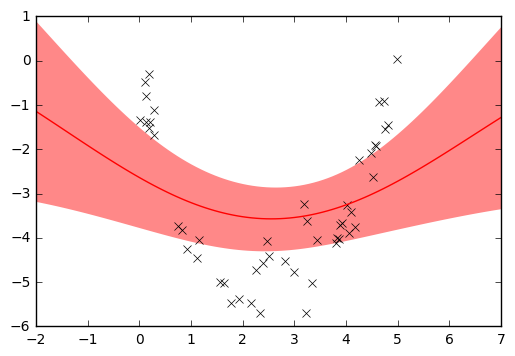

In [4]:
gp.likelihood.variance = 5.
gp.kernel.lengthscales = 5.
gp.kernel.variance = 5.

plot_posterior_mean_var(gp, X, Y, test_points)

Optimising the GP should cause the hyperparameters to return to their original state, or somewhere close.

 message: 'SciPy optimizer completed successfully.'
 success: True
       x: array([ 0.2914748 ,  2.33364444, -1.34720434])


Parameterized object gp 
 Params 
 
 
 name 
 value 
 transform 
 prior 
 
 
 gp.kernel. lengthscales 
 1.338 
 +ve (Exp) 
 nyi 
 
 
 gp.kernel. variance 
 10.315 
 +ve (Exp) 
 nyi 
 
 
 gp.likelihood. variance 
 0.260 
 +ve (Exp) 
 nyi

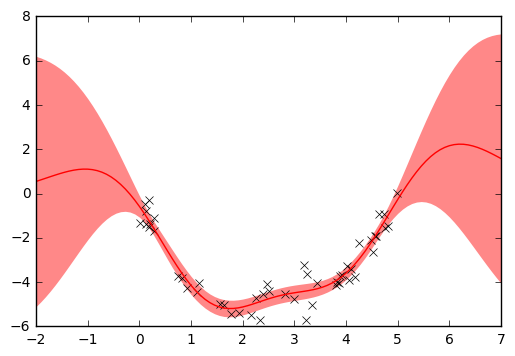

In [5]:
print(gp.optimize(X, Y, disp=False))
display_html(gp.summary(fmt='html'), raw=True)
plot_posterior_mean_var(gp, X, Y, test_points)